# Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [2]:
# !pip -upgrade scikit-learn

In [3]:
# Import all the necessary packages
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [4]:
# Import save/modified csv
df2 = pd.read_csv('/Users/reflet/Desktop/C3_Assignment 3 - Submission/customers.csv')
df2.head()

,gender,age,renumeration,score,loyalty_points
0,Male,18,12.30,39,210
1,Male,23,12.30,81,524
2,Female,22,13.12,6,40
3,Female,25,13.12,77,562
4,Female,33,13.94,40,366


<Axes: >

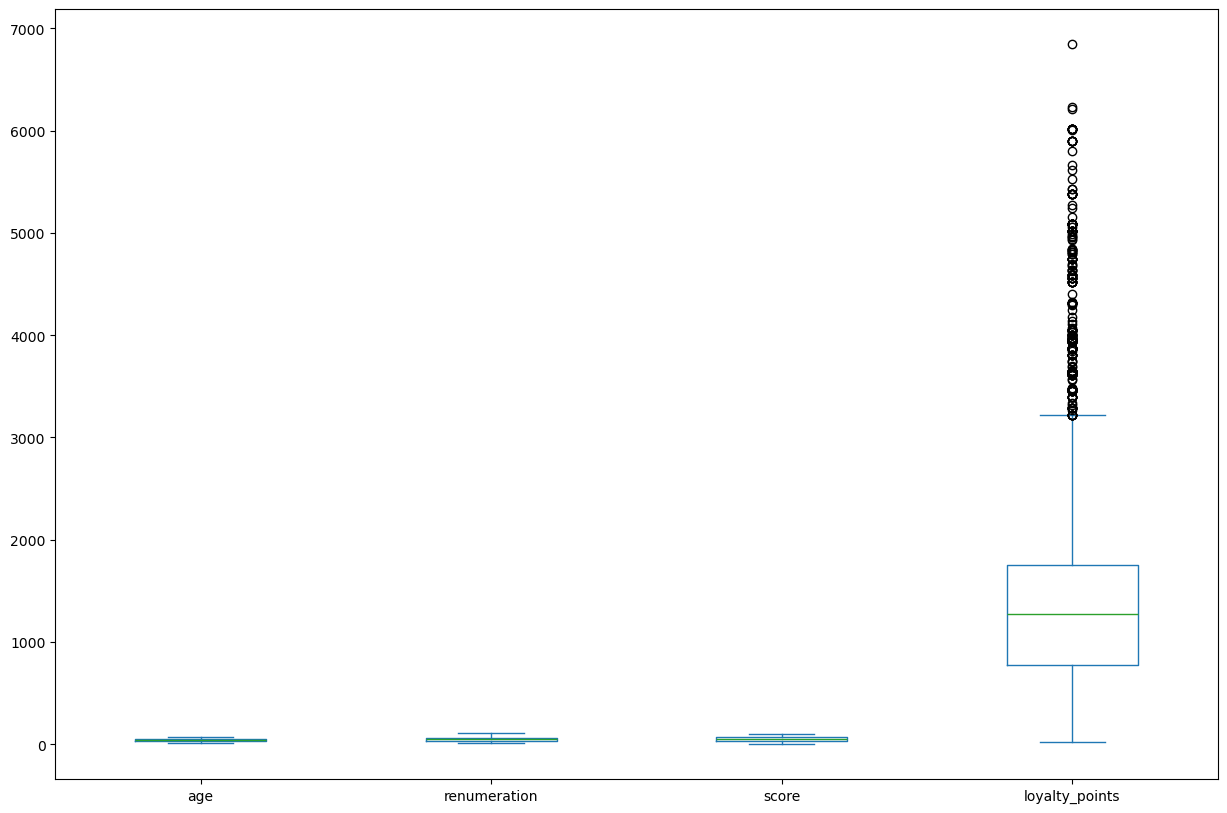

In [5]:
# Check for outliers
df2.plot(kind='box')

Insight:
- loyalty points many outliers out of numeric columns

1734

Original df2: 2,000

Number of observation that are outliers using iqr: 266

Number of observation that without outliers using iqr: 1,734

Outlier percentage using IQR: 13.30%


<Axes: ylabel='loyalty_points'>

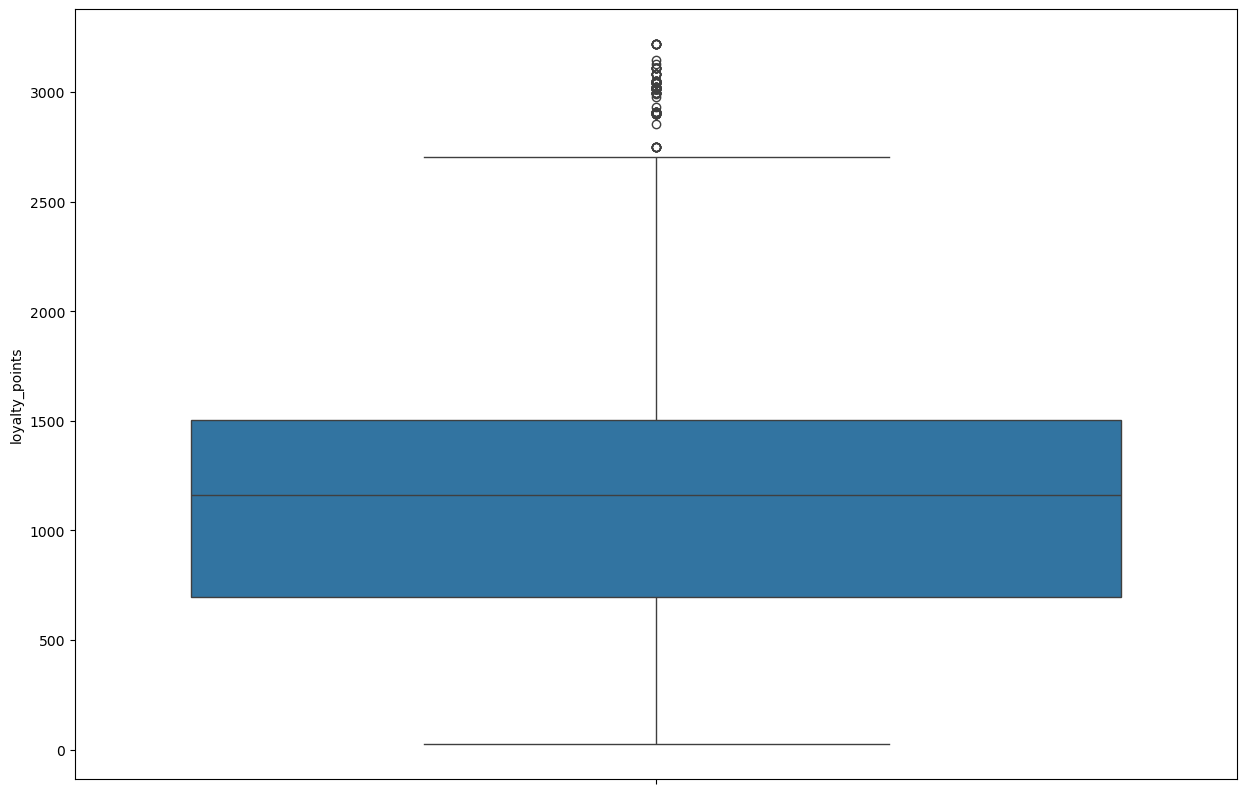

In [6]:
# IQR technique
# Calculate Q1, Q3, and IQR
Q1 = df2["loyalty_points"].quantile(0.25)
Q3 = df2["loyalty_points"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers
outlier_mask = (df2["loyalty_points"] < lower_bound) | (
    df2["loyalty_points"] > upper_bound
)

# Apply the mask to filter outliers
outliers_iqr = df2[outlier_mask]

# Subset without outlier using iqr method
df2_without_outlier_iqr = df2[~outlier_mask]

# Summary & Overview
display(df2_without_outlier_iqr.shape[0])

print(f"Original df2: {df2.shape[0]:,}")
print(f"\nNumber of observation that are outliers using iqr: {outliers_iqr.shape[0]:,}")
print(
    f"\nNumber of observation that without outliers using iqr: {df2_without_outlier_iqr.shape[0]:,}"
)
print(
    f"\nOutlier percentage using IQR: {(outliers_iqr.shape[0]/df2.shape[0]):.2%}"
)

sns.boxplot(data=df2_without_outlier_iqr, y='loyalty_points')

In [7]:
# Descriptive statistics - with outliers of locyalty_pts
display(df2_without_outlier_iqr['loyalty_points'].describe())
display(df2_without_outlier_iqr.info())

count    1734.000000
mean     1156.132065
std       683.033448
min        25.000000
25%       697.250000
50%      1160.000000
75%      1504.000000
max      3218.000000
Name: loyalty_points, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Index: 1734 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          1734 non-null   object 
 1   age             1734 non-null   int64  
 2   renumeration    1734 non-null   float64
 3   score           1734 non-null   int64  
 4   loyalty_points  1734 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 81.3+ KB


None

In [8]:
# Create your new DataFrame.
df3 = df2_without_outlier_iqr.copy()

In [9]:
# Specify Y.
y = df3[['loyalty_points']]

# Specify X
X = df3.drop(['gender', 'loyalty_points'], axis = 1) 



In [10]:
# Review X and Y.
display(y.head())
display(X.head())

,loyalty_points
0,210
1,524
2,40
3,562
4,366


,age,renumeration,score
0,18,12.30,39
1,23,12.30,81
2,22,13.12,6
3,25,13.12,77
4,33,13.94,40


In [11]:
# Test IQR outlier removal data set
# Specify Y.
y_iqr = df2_without_outlier_iqr[['loyalty_points']]

# Specify X
X_iqr = df2_without_outlier_iqr.drop(['gender', 'loyalty_points'], axis = 1) 

# Review X and Y.
display(y_iqr.head())
display(X_iqr.head())

,loyalty_points
0,210
1,524
2,40
3,562
4,366


,age,renumeration,score
0,18,12.30,39
1,23,12.30,81
2,22,13.12,6
3,25,13.12,77
4,33,13.94,40


In [12]:
# Test Z-score outlier removal data set
# Specify Y.
y_z = df3[['loyalty_points']]

# Specify X
X_z = df3.drop(['gender', 'loyalty_points'], axis = 1) 

# Review X and Y.
display(y_z.head())
display(X_z.head())

,loyalty_points
0,210
1,524
2,40
3,562
4,366


,age,renumeration,score
0,18,12.30,39
1,23,12.30,81
2,22,13.12,6
3,25,13.12,77
4,33,13.94,40


## 2. Create train and test data sets.
- Maybe look into features ranked importantce
- Cross-validation since data set is small instead of training model

In [13]:
# Split the data into test and train data.
# Create testing data
X_train2,X_test2,y_train2,y_test2=train_test_split(X_z,y_z,random_state=42,test_size=0.3)

## 3. Create Decision tree regressor

In [14]:
# Create your decision tree regressor.
# Create classifier
regressor=DecisionTreeRegressor(random_state=42)

# Fit the training data
regressor.fit(X_train2,y_train2)

DecisionTreeRegressor(random_state=42)

In [15]:
# Evaluate the model.
# # Predict using the training data
y_predict =regressor.predict(X_test2)

# Print accuracy values
print("Mean Absolute Error: ", mean_absolute_error(y_test2,y_predict)) # prediction is the same as the observation
print("Mean Squared Error: ", mean_squared_error(y_test2,y_predict)) # prediction on 'unseen data'

print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test2, y_predict)))

print(f"Accuracy of Regression Decision Tree: {math.sqrt(mean_squared_error(y_test2, y_predict)) -  mean_absolute_error(y_test2,y_predict)}")

Mean Absolute Error:  18.280230326295584
Mean Squared Error:  5246.510556621881
Root Mean Squared Error:  72.43280028151528
Accuracy of Regression Decision Tree: 54.152569955219704


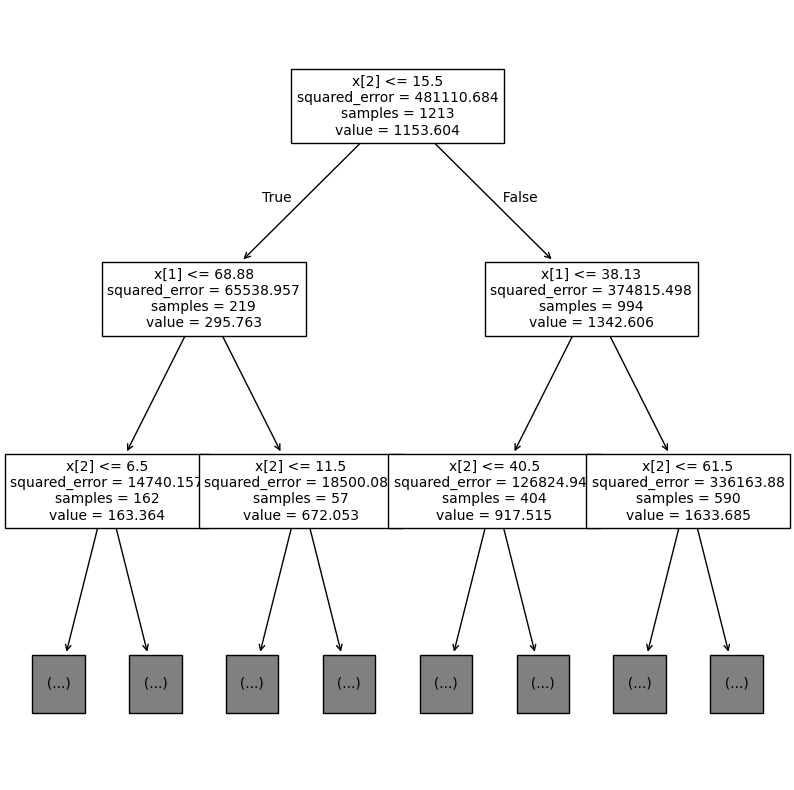

In [16]:
# Pre- Prune the model.
# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(regressor, max_depth=2, fontsize=10)

# Print the plot with plt.show().
plt.show() 

Post-pruning: without balancing feature data

In [17]:
# Pruning the model using (pre-)pruning using supplied parameters
# In practice we would use a specific method such as cost complexity pruning to evaluate alternatives.
regressorP = DecisionTreeRegressor(criterion='squared_error',
                                   splitter='best',
                                   max_leaf_nodes=5,
                                   max_features=2)
regressorP.fit(X_train2,y_train2)
y_predictP=regressorP.predict(X_test2)

# Print accuracy values
print("Mean Absolute Error: ", mean_absolute_error(y_test2,y_predictP)) # prediction is the same as the observation
print("Mean Squared Error: ", mean_squared_error(y_test2,y_predictP)) # prediction on 'unseen data'

print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test2, y_predictP)))

print(f"Accuracy of Regression Decision Tree: {math.sqrt(mean_squared_error(y_test2, y_predictP)) -  mean_absolute_error(y_test2,y_predictP)}")

Mean Absolute Error:  270.5034319048114
Mean Squared Error:  117196.74920856989
Root Mean Squared Error:  342.3401075079721
Accuracy of Regression Decision Tree: 71.8366756031607


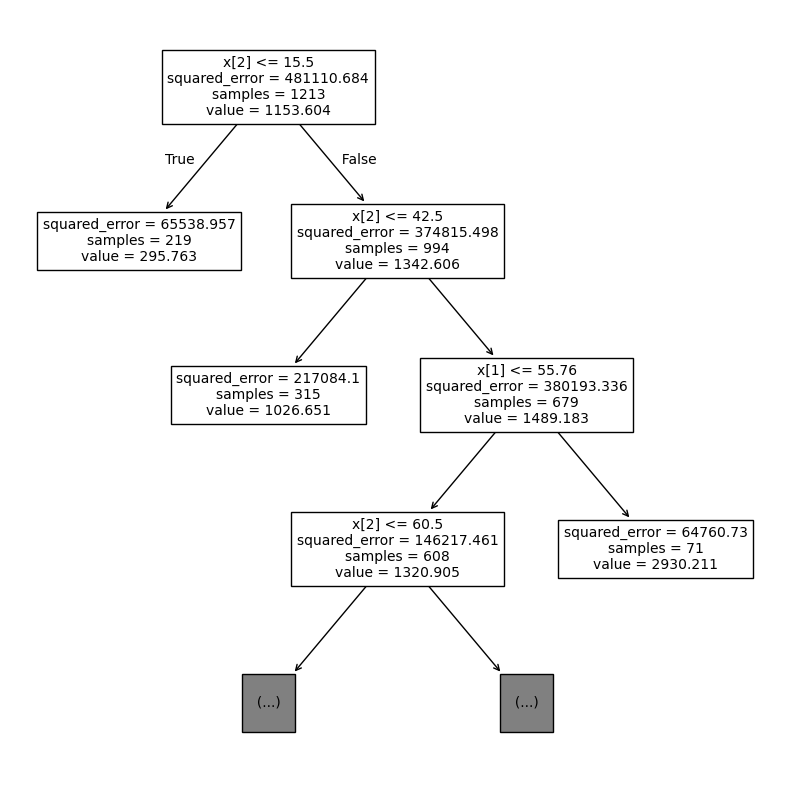

In [18]:
# Plot the pruned tree

# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(regressorP, max_depth=3, fontsize=10)

# Print the plot with plt.show().
plt.show() 